**Implement proximity-based approaches for outlier detection to find intresting patterns ina data.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

In [2]:
# Creating smaple dataset
np.random.seed(42)
X_inliers=0.3*np.random.randn(100,2)
Y_inliers=np.r_[X_inliers+2,X_inliers-2]

# Adding some outliers
X_outliers=np.random.uniform(low=-4,high=4,size=(20,2))

# Combining the inliers and outliers
X=np.r_[X_inliers,X_outliers]

In [3]:
# Step 2: k-Nearest Neighbors Outlier Detection
def knn_outlier_detection(X, k=5):
# Fit the k-NN model
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(X)

    # Calculate the distance to the k-th nearest neighbor
    distances, _ = nbrs.kneighbors(X)
    kth_distances = distances[:, -1]

    # Identify outliers based on a threshold
    threshold = np.percentile(kth_distances, 95)
    outliers_knn = X[kth_distances > threshold]
    return outliers_knn, kth_distances

In [4]:
# Step 3: Local Outlier Factor Outlier Detection
def lof_outlier_detection(X, n_neighbors=20):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    y_pred = lof.fit_predict(X)

    # LOF labels inliers as 1 and outliers as -1
    outliers_lof = X[y_pred == -1]

    return outliers_lof, lof.negative_outlier_factor_

# Detect outliers using k-NN
outliers_knn, kth_distances = knn_outlier_detection(X, k=5)

# Detect outliers using LOF
outliers_lof, lof_scores = lof_outlier_detection(X, n_neighbors=20)

In [5]:
# Step 4: Plot the results
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

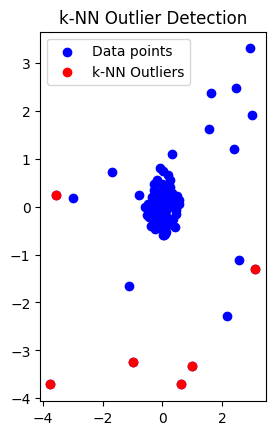

In [6]:
# Plot original data and outliers detected by k-NN
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data points')
plt.scatter(outliers_knn[:, 0], outliers_knn[:, 1], color='red', label='k-NN Outliers')
plt.title('k-NN Outlier Detection')
plt.legend()

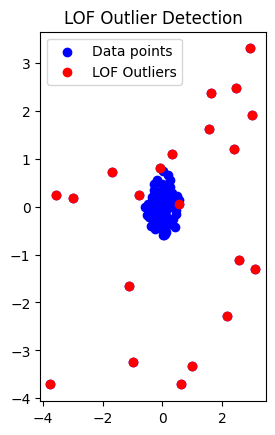

In [7]:
# Plot original data and outliers detected by LOF\
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data points')
plt.scatter(outliers_lof[:, 0], outliers_lof[:, 1], color='red', label='LOF Outliers')
plt.title('LOF Outlier Detection')
plt.legend()

plt.show()